# Assignment 2

## Overview

1. Implement Box-Muller and Acceptance-Rejection methods to generate normal random variables
2. Implement Acceptance-Rejection method to generate variable following a target density function
3. Implement antithectic variable technique to reduce variance in function approximation

- Methods covered: Box-Muller, acceptance-rejection, antithetic variates, Monte-Carlo
- Distributions: normal distribution, distribution with a given target density

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat

__My functions__

- Import the functions to generate variables by Inverse Transform Method written by me in the last assignment as helper functions


In [2]:
from NumAnFunctions import *

For example, `exp_itm` is the function to generate random variables following Exponential distribution by using Inverse Transform Method that I have written in _Assignment `_

## 1. Generate N random variables from Normal distribution

### Using Box-Muller Method

In [3]:
def normal_BoxMuller(mean, std, two = False, N = 1, shape_X = (-1,), shape_Y = (-1,)):
    
    #Generate "intermediate" variables
    D = exp_itm(lmd = 1/2, N = N)
    T = np.random.uniform(0, (2*np.pi), N)
    
    Z = np.sqrt(D)*np.sin(T)
    X = mean + std*Z
    
    if two:
        Zy = np.sqrt(D)*np.cos(T)
        Y = mean + std*Zy
        return X.reshape(shape_X), Y.reshape(shape_Y)
    
    return X.reshape(shape_X)

### Using Acceptance-Rejection Method

In [4]:
def normal_ar(mean, std, N = 1, shape = (-1,)):
    
    
    
    # Generate |Z| by Acceptance - Rejection
    absZ = np.array([])
    
    for _ in range(N):
        accept_Y = False
        
        while accept_Y == False:
            #Generate one Y
            Y = float(exp_itm(lmd = 1, N = 1))
            
            #Generate one W
            W = float(exp_itm(lmd = 1, N = 1))
            
            #Check the condition
            if W >= (1/2)*((Y - 1)**2):
                absZ = np.append(absZ, Y)
                accept_Y = True
    
    #Generate Z ~ Normal(0,1) from |Z|
    U = np.random.uniform(0, 1, N)
    S = np.where(U < 0.5, -1, 1)
    Z = S*absZ
    
    #Generate X ~ Normal(mean, std)
    X = mean + std*Z
    
    return X.reshape(shape)

__Generating and Plotting__

In [5]:
meanX = 1
stdX = 2
N = 1000

In [6]:
#X generated by Acceptance - Rejection algo
X_ar = normal_ar(mean = meanX, std = stdX, N = N)

#X generated by Box-Muller algo
X_BoxMuller = normal_BoxMuller(mean = meanX, std = stdX, N = N)

#Actual X
X_actual = np.linspace(stat.norm.ppf(0.001, loc = meanX, scale = stdX),
                       stat.norm.ppf(0.999, loc = meanX, scale = stdX),
                       N)
X_actual_pdf = stat.norm.pdf(X_actual, loc = meanX, scale = stdX)

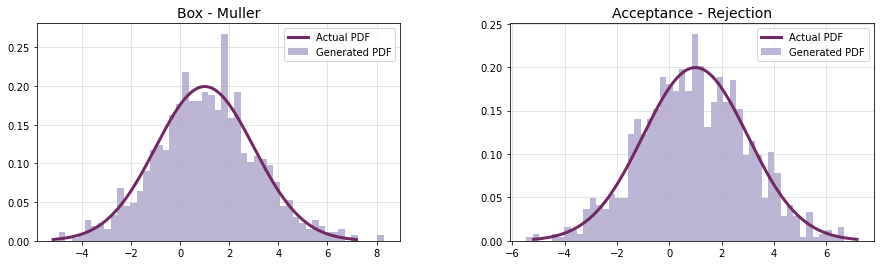

In [7]:
fig = plt.figure(figsize = (15, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Box - Muller', size = 14)
ax1.hist(X_BoxMuller, bins = 50, density = True, label = 'Generated PDF', color = '#BDB5D5')
ax1.plot(X_actual, X_actual_pdf, label = 'Actual PDF', color = '#702963', lw = 3)
ax1.legend()
ax1.grid(True, alpha = 0.4)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Acceptance - Rejection', size = 14)
ax2.hist(X_ar, bins = 50, density = True, label = 'Generated PDF', color = '#BDB5D5')
ax2.plot(X_actual, X_actual_pdf, label = 'Actual PDF', color = '#702963', lw = 3)
ax2.legend()
ax2.grid(True, alpha = 0.4)

plt.subplots_adjust(wspace = 0.3)
plt.show()

---
## 2. Generate 300 random variables with the target density

Suppose the target density is $f(x) = ksin(\pi x)$ on the support set $[0, 1]$, where $k$ is the normalization constant.

The proposal density is $f(x) = mx(1-x)$ on te  same support set, where $m$ is the normalization constant.

Use the _acceptance-rejection_ method to generate 300 random varibales with the target density.

In [8]:
N = 300

__(1) The normalization constants__

- By the way we define $k$, $k$ must satisfy the following condition:

    $ \int_{0}^{1} ksin(\pi x) \,dx = 1 \Leftrightarrow k = \large \frac{\pi}{2}$ 
    

- Similarly, by the way we define $m$. $m$ must satisfy the following condition:

    $ \int_{0}^{1} mx(1-x) \, dx = 1 \Leftrightarrow m = 6$

In [9]:
k = np.pi/2
m = 6

__(2) Generate $Y \sim f_Y(y) = my(1-y)$__

To generate Y following the proposed density function, we use _Acceptance - Rejection Method_ since it's impossible to use Inverse Transform Method on the high degree polynomial cumulative probability function.

- Choose $U(0,1)$ as the "close" distribution since $U(0,1)$ has the same support set $[0, 1]$ as $Y$

__(3) The condition for acceptance__

- We accept variables when the following condition is met:

    $ U \le \large \frac{f_Y(Y)}{c.g_Y(Y)} $ where $c = \sup_Y \left \{ \frac{f_Y (Y)}{g_Y (Y)} \right \}$ 
    
- Examnining the function

    $ \large \frac{f_Y (Y)}{g_Y (Y)} = \large \frac{\pi sin(\pi Y)}{12 Y (1-Y)}$ on the support set $[0,1]$, we obtain the maximum value:

    $\normalsize \max_Y \frac{f_Y (Y)}{g_Y (Y)} = \large \frac{\pi}{3} $ at $ Y = \frac{1}{2}$
    
- Thus, the condition for acceptance is

    $ U \le \large \frac{sin(\pi Y)}{4Y(1-Y)} $


In [10]:
#Generating random variables by Acceptance-Rejection
X = np.array([])

for _ in range(N):
    
    accept_Y = False
    
    while accept_Y == False:
        #Generate U
        U = float(np.random.uniform(0, 1, 1))
    
        #Generate "close distribution"
        accept_Yu = False
    
        while accept_Yu == False:
            U1 = float(np.random.uniform(0,1,1))
            U2 = float(np.random.uniform(0,1,1))
            if U1 <= 4*(U2 - U2**2):
                accept_Yu = True
                Y = U2
                
        if U <= (np.sin(np.pi*Y)/(4*Y*(1-Y))):
            accept_Y = True
            X = np.append(X, Y)

In [11]:
#The actual density function on the support set
X_actual = np.linspace(0, 1, N)
X_actual_density = k*np.sin(np.pi*X_actual)

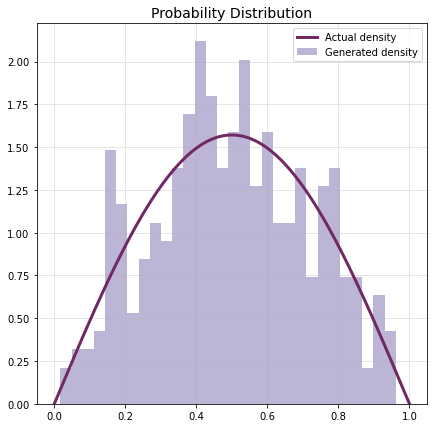

In [12]:
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(1,1,1)
ax.set_title('Probability Distribution', size = 14)
ax.grid(True, alpha = 0.4)

#Plotting generated value
ax.hist(X, bins = 30, density = True, label = 'Generated density', color = '#BDB5D5')

#Plotting actual density function
ax.plot(X_actual, X_actual_density, label = 'Actual density', lw = 3, color = '#702963' )

ax.legend()

plt.show()

---
## 3. Antithetic Variables

The integral:

$\large I = \int_{0}^{1} \frac{1}{1+x} \, dx$

The integral $I$ is the mean of the function $\large \frac{1}{1+X}$.

Denote
- $Y = f(X) = \large \frac{1}{1+X}$


- $\large I_{mc} = \frac{1}{n} \Sigma_{i=1}^{10} Y_i $


- $ \large I_{mc} = \{I_{mc, 1}, I_{mc,2}, ... I_{mc, nrep} \}$ where $nrep$ is the number of replications

### (a) Estimate the integral by Monte Carlo approach

Use 10 uniform random numbers for each replication

Denote `nrep` as the number of replications

In [13]:
nrep = 1000

In [14]:
Imc_sample = np.array([])
Uset_a = np.array([])
for rep_i in range(nrep):
    
    #Generate 10 uniform random numbers
    U = np.random.uniform(0, 1, 10)
    Uset_a = np.append(Uset_a, U).reshape((rep_i+1, -1))
    
    #Calculate Y
    Y = 1/(1+U)
    Imc = np.mean(Y)
    
    #Add Ymean to the sample
    Imc_sample = np.append(Imc_sample, Imc)

In [15]:
Imc_sample.shape

(1000,)

After running 1000 replications, we obtain a sample of 1000 values.

#### State the estimator and compare it to the actual integral value

Based on the above sample, we calculate the estimator for the integral as follow

In [16]:
Imc_est = np.mean(Imc_sample)
Imc_est

0.6930865371248391

- _The actual value of integral_

$ I = \int_{0}^{1} \frac{1}{1+x} \, dx = ln|1+x| \,\bigg\rvert_{0}^{1} = ln|2| \approx 0.6931$

In [17]:
np.log(2)

0.6931471805599453

As can be seen, the estimator for integral and the actual value of integral itself are pretty close to each other

#### State the sample variance of the estimator

The unbiased variance of the sample is

In [18]:
Imc_var = 1/(nrep - 1) * np.sum((Imc_sample - Imc_est)**2)
Imc_var

0.0018622511873198876

### b) Variance reduction by antithetic method

Use the set of random numbers produced in ___(a)___, which was saved in the array `Uset`.

- The `Uset` array contains all the set of U generated for each replication. It is intended to be a matrix with the number of rows equal to the number of replications and the number of columns equal to the number of random values used in one estimation.
- The structure of `Uset` should look as follows:

$
\begin{pmatrix}
U^{1}_{1} & U^{1}_{2} & ... & U^{1}_{10} \\
U^{2}_{1} & U^{2}_{2} & ... & U^{2}_{10} \\
... \\
U^{nrep}_{1} & U^{nrep}_{2} & ... & U^{nrep}_{10}
\end{pmatrix}
$

In [19]:
Uset_a.shape

(1000, 10)

Create a matrix called `Uset_b` that contains the random numbers used for Monte-Carlo reduced variance simulation
- number of rows: `nrep` (the number of replications) 
- number of columns: 10 (the number of values used for one replication)
- The first 5 values of each row are taken from the original `Uset` generated in ___(a)___
- The last 5 values of each row are the _antithetic variables_ of the first 5 values, determined as $ U^{antithetic} = 1 - U_i$ for $i = 1, 2, .. 5$

The array `Uset_b` should has the following form

$
\begin{pmatrix}
U^{1}_{1} & U^{1}_{2} & ... & U^{1}_{5} & (1-U^{1}_{1}) & (1-U^{1}_{2}) ... & (1-U^{1}_{5}) \\
U^{2}_{1} & U^{2}_{2} & ... & U^{2}_{5} & (1-U^{2}_{1}) & (1-U^{2}_{2}) ... & (1-U^{2}_{5}) \\
... \\
U^{nrep}_{1} & U^{nrep}_{2} & ... & U^{nrep}_{5} & (1-U^{nrep}_{1}) & (1-U^{nrep}_{2}) ... & (1-U^{nrep}_{5}) \\
\end{pmatrix}
$


In [20]:
Uset_b = np.copy(Uset_a)
Uset_b[:, 5:] = 1 - Uset_b[:, :5]

In [21]:
print('The set used for the first replication in (a) is')
print(Uset_a[0, :5])
print(Uset_a[0, 5:])
print('-----')
print('The set used for the first replication in (b) is')
print(Uset_b[0, :5])
print(Uset_b[0, 5:])

The set used for the first replication in (a) is
[0.70138999 0.33017518 0.99114392 0.1891129  0.34697751]
[0.02145774 0.58099337 0.91277773 0.05608372 0.86955015]
-----
The set used for the first replication in (b) is
[0.70138999 0.33017518 0.99114392 0.1891129  0.34697751]
[0.29861001 0.66982482 0.00885608 0.8108871  0.65302249]


In [22]:
Imcr_sample_b = np.array([])

for rep_j in range(Uset_b.shape[0]):
    Y = 1/(1 + Uset_b[rep_j])
    Imcr = np.mean(Y)
    Imcr_sample_b = np.append(Imcr_sample_b, Imcr)

In [23]:
Imcr_sample_b.shape

(1000,)

After running 1000 replications, we obtain a sample of 1000 values.

#### State the estimator and compare it to the actual integral value

Based on the above sample, we calculate the estimator for the integral as follow

In [24]:
Imcr_est_b = np.mean(Imcr_sample_b)
Imcr_est_b

0.693235821112632

In [25]:
np.log(2)

0.6931471805599453

As can be seen, the estimator for integral and the actual value of integral itself are pretty close to each other, closer than the estimation in part a to the actual mean

#### State the sample variance of the estimator

The unbiased variance of the sample is

In [26]:
Imcr_var_b = 1/(nrep - 1) * np.sum((Imcr_sample_b - Imcr_est_b)**2)
Imcr_var_b

0.00011346060032710351

#### Compare to variance in ___(a)___

In [27]:
print('The sample variance of the estimator calculating through Monte-Carlo approach is {:.6f}'.format(Imc_var))
print('The sample variance of the estimator calculating through Monte-Carlo approach with antithetic variables is {:.6f}'.format(Imcr_var_b))
print('The ratio of Imc_var/Imcr_var is: {:.2f}'.format(Imc_var/Imcr_var_b))

The sample variance of the estimator calculating through Monte-Carlo approach is 0.001862
The sample variance of the estimator calculating through Monte-Carlo approach with antithetic variables is 0.000113
The ratio of Imc_var/Imcr_var is: 16.41


As the results show, by using the Antithetic Variable Method, we could reduce sample variance by about 16 times

### (c)  Using $\tilde{U}$

Create a matrix called `Uset_c` that contains the random numbers with $\tilde{U}$
- number of rows: `nrep` (the number of replications) 
- number of columns: 10 (the number of values used for one replication)
- The first 5 values of each row are taken from the original `Uset` generated in ___(a)___
- The last 5 values of each row are the variables in $\tilde{U}$ set

$\tilde{U} = \left\{ (1-U_1), \, U_2, \, U_3, \, (1-U_4), \, U_5) \right\}$

The array `Uset_c` should has the following form

$
\begin{pmatrix}
U^{1}_{1} & U^{1}_{2} & ... & U^{1}_{5} & (1-U^{1}_{1}) & U^{1}_{2} ... & (1-U^{1}_{5}) \\
U^{2}_{1} & U^{2}_{2} & ... & U^{2}_{5} & (1-U^{2}_{1}) & U^{2}_{2} ... & (1-U^{2}_{5}) \\
... \\
U^{nrep}_{1} & U^{nrep}_{2} & ... & U^{nrep}_{5} & (1-U^{nrep}_{1}) & U^{nrep}_{2} ... & (1-U^{nrep}_{5}) \\
\end{pmatrix}
$

In [28]:
Utilde = np.array((1 - Uset_a[:,0], Uset_a[:,1], Uset_a[:,2], 1 - Uset_a[:, 3], Uset_a[:,4])).T

In [29]:
Uset_c = np.concatenate([Uset_a[:, :5], Utilde], axis = 1)

In [30]:
print('(a)')
print(Uset_a[0, :5])
print(Uset_a[0, 5:])
print('-----')
print('(c)')
print(Uset_c[0, :5])
print(Uset_c[0, 5:])
#print(Uset_b[0, 5:])

(a)
[0.70138999 0.33017518 0.99114392 0.1891129  0.34697751]
[0.02145774 0.58099337 0.91277773 0.05608372 0.86955015]
-----
(c)
[0.70138999 0.33017518 0.99114392 0.1891129  0.34697751]
[0.29861001 0.33017518 0.99114392 0.8108871  0.34697751]


In [31]:
Imcr_sample_c = np.array([])

for rep_j in range(Uset_c.shape[0]):
    Y = 1/(1 + Uset_c[rep_j])
    Imcr = np.mean(Y)
    
    Imcr_sample_c = np.append(Imcr_sample_c, Imcr)

In [32]:
Imcr_sample_c.shape

(1000,)

#### State the estimator and compare it to the actual integral value

Based on the above sample, we calculate the estimator for the integral as follow

In [33]:
Imcr_est_c = np.mean(Imcr_sample_c)
Imcr_est_c

0.6923527487581764

In [37]:
np.log(2)

0.6931471805599453

As can be seen, the estimator for integral and the actual value of integral itself are pretty close to each other

#### State the sample variance of the estimator

The unbiased variance of the sample is

In [34]:
Imcr_var_c = 1/(nrep - 1) * np.sum((Imcr_sample_c - Imcr_est_c)**2)
Imcr_var_c

0.0023183461014878314

#### Compare the sample variance to _(a)_ and _(b)_:

In [35]:
print('The sample variance of the estimator calculating through Monte-Carlo approach is {:.6f}'.format(Imc_var))
print('The sample variance of the estimator calculating through Monte-Carlo approach with antithetic variables is {:.6f}'.format(Imcr_var_c))
print('The ratio of Imc_var/Imcr_var is: {:.2f}'.format(Imc_var/Imcr_var_c))

The sample variance of the estimator calculating through Monte-Carlo approach is 0.001862
The sample variance of the estimator calculating through Monte-Carlo approach with antithetic variables is 0.002318
The ratio of Imc_var/Imcr_var is: 0.80


- The sample variance calculated using `Uset_c` is ___higher___ than the sample variance calculated using `Uset_b` and the original `Uset` in part a.
- The reason could be that for each set of random numbers `U` used to estimate $I_mc$, there are duplicated values of $U_2$, $U_3$, and $U_5$. Although there are antihetic variables like $1 - U_1$ and $1 - U_4$, the covariance within the set still increases (compared to the sets used in _a_ and _b_). Therefore, the sample variance in part c is higher than that in a and b

#### Visualize the results

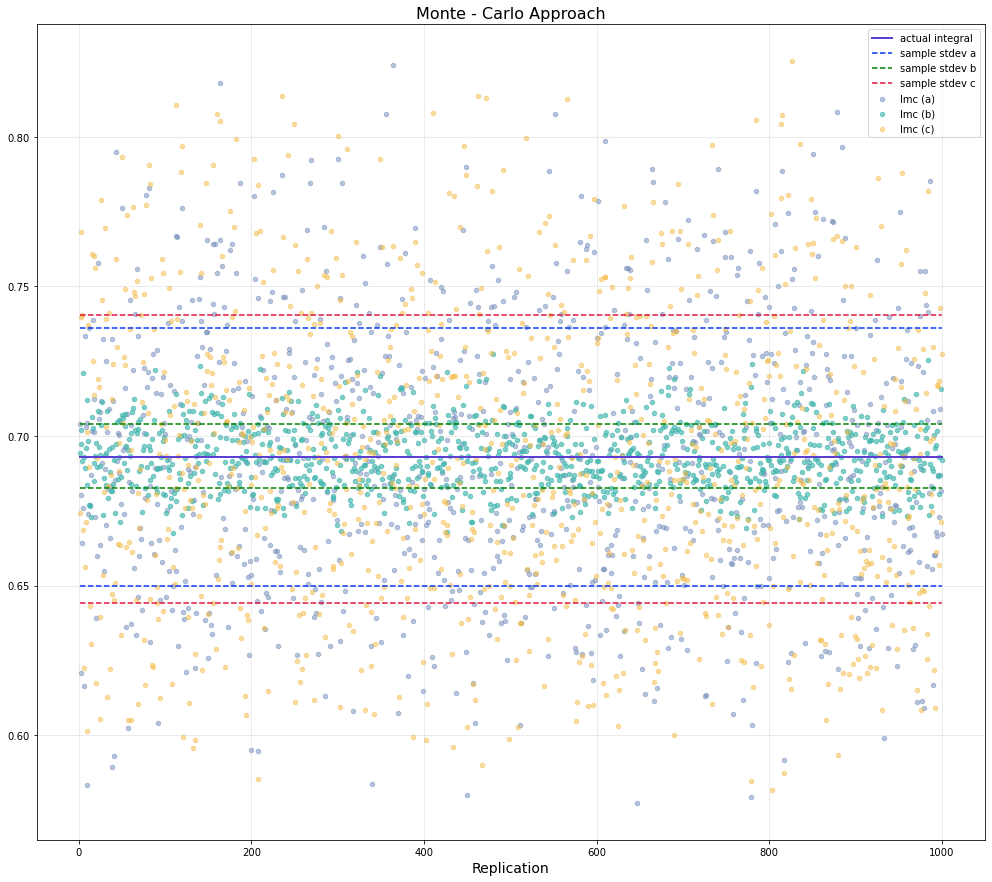

In [36]:
replication = np.arange(1, nrep+1)
fig = plt.figure(figsize = (17,15))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monte - Carlo Approach', size = 16)
ax.set_xlabel('Replication', size = 14)

#-----------The actual integral-----------
ax.plot(replication, np.full((nrep,), np.log(2)), label = 'actual integral', color = '#5D3FD3', lw = 2)


#-----------Monte Carlo Approach with 10 random variables----------

#I_mc
ax.scatter(replication, Imc_sample, label = 'Imc (a)', alpha = 0.5, s = 20, color = '#728BB9')

#Standard deviation bounds
upper_bound = Imc_est + np.sqrt(Imc_var)
lower_bound = Imc_est - np.sqrt(Imc_var)
ax.plot(replication, np.full((nrep,), upper_bound), '--', color = '#0437F2', label = 'sample stdev a')
ax.plot(replication, np.full((nrep,), lower_bound), '--', color = '#0437F2')


#-----------Monte Carlo Approach with antithetic variables----------

#I_mc with antithetic variables
ax.scatter(replication, Imcr_sample_b, label = 'Imc (b)', alpha = 0.65, s = 20, color = '#40B5AD')

#Standard deviation bounds
upper_bound_reduced = Imcr_est_b + np.sqrt(Imcr_var_b)
lower_bound_reduced = Imcr_est_b - np.sqrt(Imcr_var_b)
ax.plot(replication, np.full((nrep,), upper_bound_reduced), '--', color = '#008000', label = 'sample stdev b')
ax.plot(replication, np.full((nrep,), lower_bound_reduced), '--', color = '#008000')


#-----------Monte Carlo Approach with antithetic variables and duplicated values----------

#I_mc with antithetic and duplicated values
ax.scatter(replication, Imcr_sample_c, label = 'Imc (c)', alpha = 0.5, s = 20, color = '#F4BB44')

#Standard deviation bounds
upper_bound_reduced2 = Imcr_est_c + np.sqrt(Imcr_var_c)
lower_bound_reduced2 = Imcr_est_c - np.sqrt(Imcr_var_c)
ax.plot(replication, np.full((nrep,), upper_bound_reduced2), '--', color = '#DC143C', label = 'sample stdev c')
ax.plot(replication, np.full((nrep,), lower_bound_reduced2), '--', color = '#DC143C')



ax.legend()
plt.grid(True, alpha = 0.3)
plt.show()